# Question 4B
Take grayscale image of size $512\times512$, add some Gaussian noise and observe the ringing effect of ideal low pass filter on the image. Use different radius (D0) of ideal low pass filter and display their results in frequency domain.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image+noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

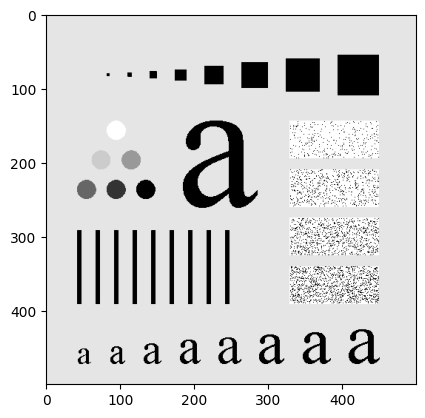

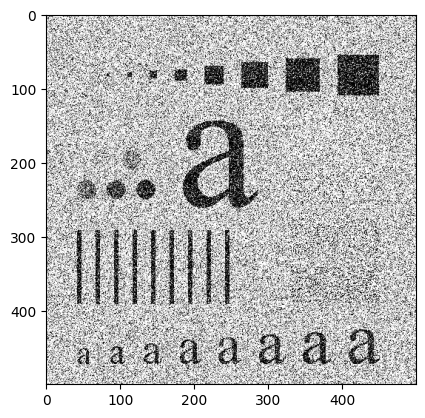

In [5]:
# opening image
original_image = plt.imread('pattern.tif').copy()
gaussian_noisy_image = add_gaussian_noise(original_image, mean=0, std=125)
plt.imshow(original_image, cmap='gray')
plt.show()

plt.imshow(gaussian_noisy_image, cmap='gray')
plt.show()

In [6]:
def ideal_low_pass_filter(image , cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = d <= d0

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))

    return filtered_image

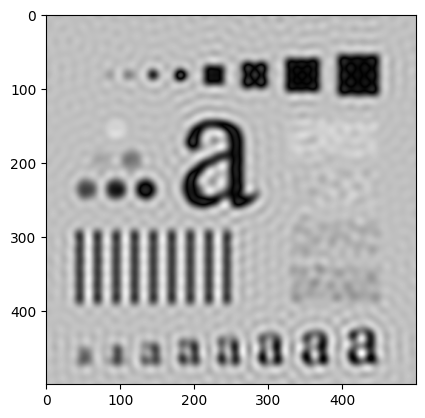

In [7]:
idealFilteredImage = ideal_low_pass_filter(original_image, 30)
plt.imshow(idealFilteredImage, cmap="gray")